### 📊 **Livestock Production: Data Cleaning and Initial Visualization**

- **This notebook loads the dataset `1_Производство.xlsx`, performs data cleaning by removing unnecessary rows and textual elements, and generates an initial visualization to explore key production metrics.**  
- Unnecessary rows and blocks of text are removed  
- An initial comparison chart is created for 2023 vs 2024 production data  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Загрузка с пропуском первых 4 строк, чтобы получить заголовки
df = pd.read_excel("data/1_Производство.xlsx", sheet_name='1.', header=4)

# Удалим строки, где нет категории продукции
df = df[df[df.columns[0]].notna()]

# Переименуем первую колонку для читаемости
df = df.rename(columns={df.columns[0]: "Категория"})

# Оставим только первые 3 колонки: Категория, 2024, 2023
df_filtered = df[["Категория", df.columns[1], df.columns[2]]].copy()

# Преобразуем в числовой формат (если возможно)
df_filtered[df.columns[1]] = pd.to_numeric(df_filtered[df.columns[1]], errors='coerce')
df_filtered[df.columns[2]] = pd.to_numeric(df_filtered[df.columns[2]], errors='coerce')

# Удалим строки, где обе ячейки пусты
df_filtered = df_filtered.dropna(subset=[df.columns[1], df.columns[2]], how='all')

# Сбросим индексы
df_filtered = df_filtered.reset_index(drop=True)

# Сохраним очищенный файл
df_filtered.to_excel("data/1_Производство_cleaned.xlsx", index=False)

df_filtered.head()


,Категория,2024г.,2023г.
0,Забито в хозяйстве или реализовано на убой ск...,1112597.55,1023772.93
1,в т.ч. крупный рогатый скот,370217.10,320916.63
2,овцы,98695.19,91914.27
3,козы,7645.66,7225.27
4,свиньи,45824.10,48412.43


C:\Users\aruzh\AppData\Local\Temp\ipykernel_11800\4114734012.py:65: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\aruzh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


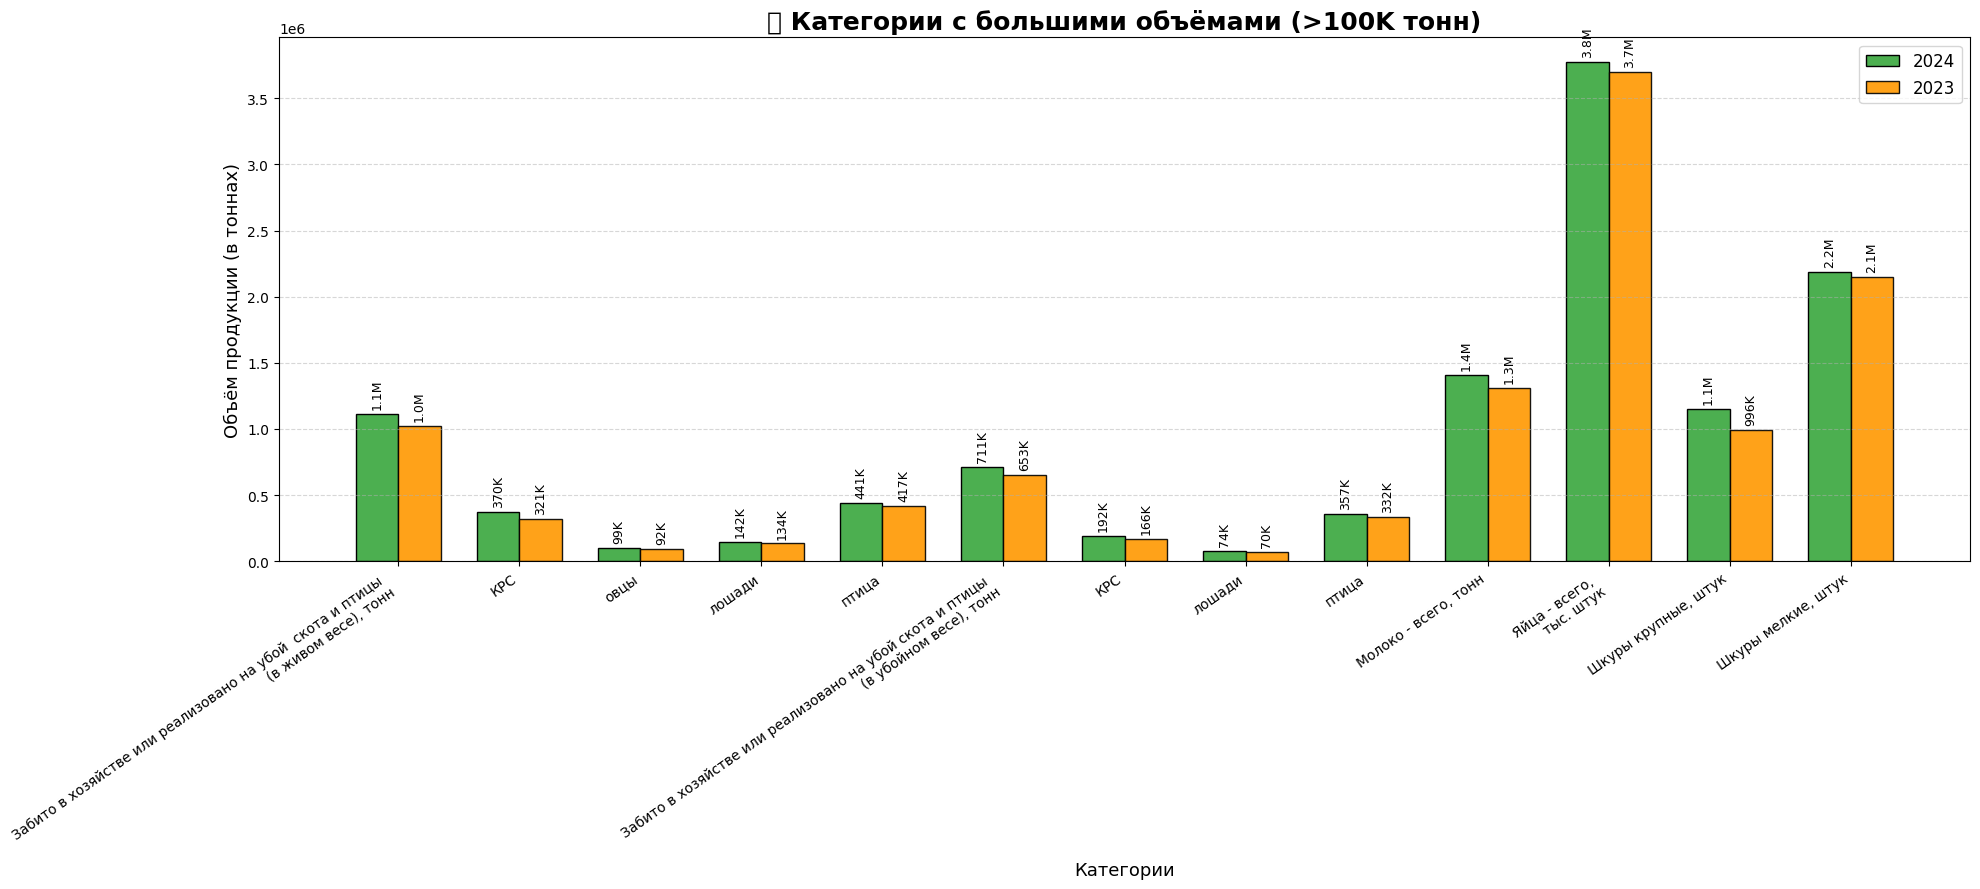

C:\Users\aruzh\AppData\Local\Temp\ipykernel_11800\4114734012.py:97: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\aruzh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


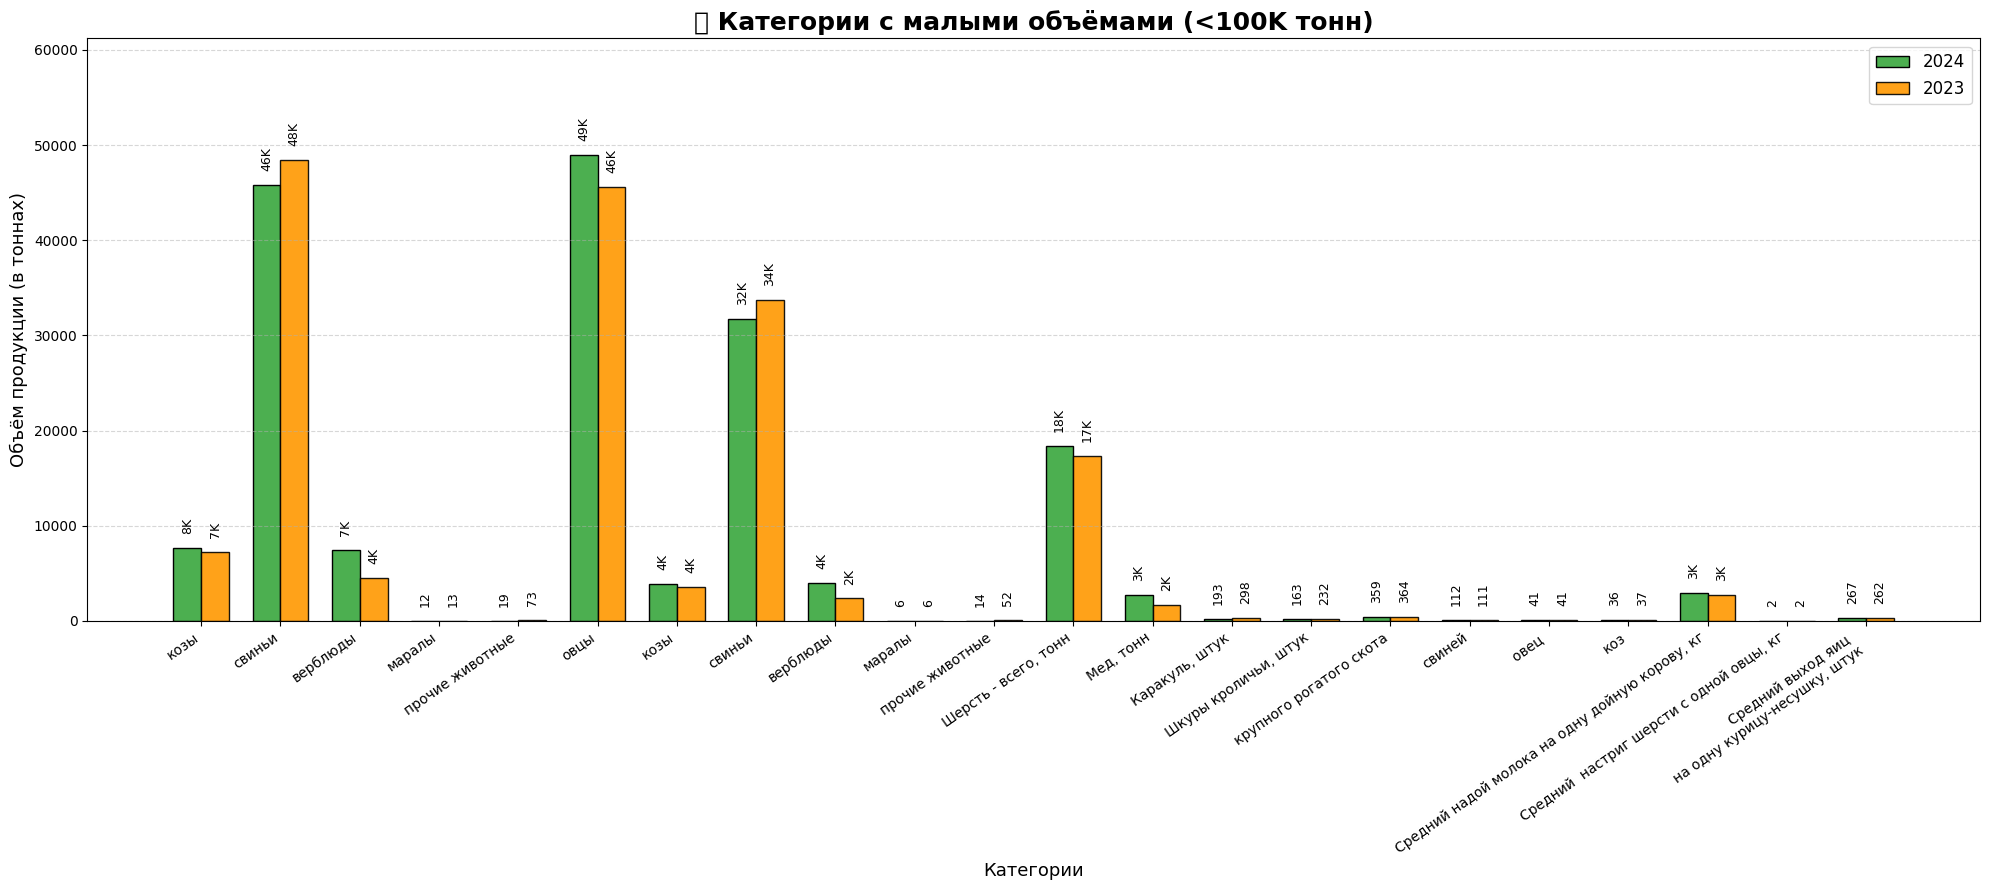

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
df_filtered = pd.read_excel("data/1_Производство_cleaned.xlsx")

# Упрощение категорий
df_filtered["Категория"] = df_filtered["Категория"].replace({
    "Забито в хозяйстве или реализовано на убой  скота и птицы": "Забой",
    "в т.ч. крупный  рогатый скот": "КРС",
    "Молоко натуральное": "Молоко",
    "Средний надой молока на одну дойную корову": "Надой/коров",
    "Средняя настриг шерсти с одной овцы": "Настриг",
    "Шерсть всего, тонн": "Шерсть",
    "в т.ч. овцы": "Овцы",
    "в т.ч. козы": "Козы",
    "в т.ч. свиньи": "Свиньи",
    "в т.ч. лошади": "Лошади",
}, regex=False)

# Суммарное значение для разбиения
df_filtered["Total"] = df_filtered[df_filtered.columns[1]].fillna(0) + df_filtered[df_filtered.columns[2]].fillna(0)

# Делим на большие и маленькие категории
df_large = df_filtered[df_filtered["Total"] >= 100000]
df_small = df_filtered[df_filtered["Total"] < 100000]

# Функция коротких чисел
def short_number(n):
    if n >= 1_000_000:
        return f"{n/1_000_000:.1f}M"
    elif n >= 1_000:
        return f"{n/1_000:.0f}K"
    else:
        return f"{n:.0f}"

# === 1. Большие значения ===
categories = df_large["Категория"]
values_2024 = df_large[df_large.columns[1]]
values_2023 = df_large[df_large.columns[2]]
x = np.arange(len(categories))
bar_width = 0.35

plt.figure(figsize=(20, 9))
bars_2024 = plt.bar(x - bar_width/2, values_2024, bar_width, label="2024", color="#4CAF50", edgecolor="black")
bars_2023 = plt.bar(x + bar_width/2, values_2023, bar_width, label="2023", color="#FF9800", edgecolor="black", alpha=0.9)

plt.title("📊 Категории с большими объёмами (>100K тонн)", fontsize=18, weight='bold')
plt.xlabel("Категории", fontsize=13)
plt.ylabel("Объём продукции (в тоннах)", fontsize=13)
plt.xticks(x, categories, rotation=35, ha="right", fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Подписи
max_y = max(values_2024.max(), values_2023.max())
for bars in [bars_2024, bars_2023]:
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            plt.text(bar.get_x() + bar.get_width()/2, height + max_y * 0.01, short_number(height),
                     ha='center', va='bottom', fontsize=9, rotation=90)

plt.tight_layout()
plt.show()

# === 2. Маленькие значения ===
categories = df_small["Категория"]
values_2024 = df_small[df_small.columns[1]]
values_2023 = df_small[df_small.columns[2]]
x = np.arange(len(categories))

plt.figure(figsize=(20, 9))
bars_2024 = plt.bar(x - bar_width/2, values_2024, bar_width, label="2024", color="#4CAF50", edgecolor="black")
bars_2023 = plt.bar(x + bar_width/2, values_2023, bar_width, label="2023", color="#FF9800", edgecolor="black", alpha=0.9)

plt.title("📊 Категории с малыми объёмами (<100K тонн)", fontsize=18, weight='bold')
plt.xlabel("Категории", fontsize=13)
plt.ylabel("Объём продукции (в тоннах)", fontsize=13)
plt.xticks(x, categories, rotation=35, ha="right", fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Настройка масштаба для видимости
max_y = max(values_2024.max(), values_2023.max())
plt.ylim(0, max_y * 1.25)

# Подписи
for bars in [bars_2024, bars_2023]:
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            plt.text(bar.get_x() + bar.get_width()/2, height + max_y * 0.03, short_number(height),
                     ha='center', va='bottom', fontsize=9, rotation=90)

plt.tight_layout()
plt.show()
